In [14]:
import pandas as pd
import seaborn as sns
import os

In [18]:
save_dir = r"/Users/James/Documents/Python/Machine Learning Projects/Spotify_Listening_Analysis/Spotify 2.0/ml_stuff/prediction"

In [7]:
prediction_pkl_path = r"/Users/James/Documents/Python/Machine Learning Projects/Spotify_Listening_Analysis/Spotify 2.0/ml_stuff/prediction/prediction_dataframe.pkl"
prediction_df_raw = pd.read_pickle(prediction_pkl_path)
prediction_df = prediction_df_raw.copy()
rollingstones_csv_pkl_path = r"/Users/James/Documents/Python/Machine Learning Projects/Spotify_Listening_Analysis/Spotify 2.0/preprocessing/pickles/rolling_stones_features.pkl"
stones_500_raw = pd.read_pickle(rollingstones_csv_pkl_path)
stones_500 = stones_500_raw.copy()
stones_album_list_path = r"/Users/James/Documents/Python/Machine Learning Projects/Spotify_Listening_Analysis/Spotify 2.0/preprocessing/pickles/rollingstones_csv.pkl"
stones_albums_list_raw = pd.read_pickle(stones_album_list_path)
stones_albums_list = stones_albums_list_raw.copy()

In [8]:
prediction_df

,artist,track,predicted_playcount
0,The Beatles,Sgt. Pepper's Lonely Hearts Club Band - Remast...,0.825271
1,The Beatles,With A Little Help From My Friends - Remastere...,0.844859
2,The Beatles,Lucy In The Sky With Diamonds - Remastered 2009,0.873072
3,The Beatles,Getting Better - Remastered 2009,0.841100
4,The Beatles,Fixing A Hole - Remastered 2009,0.835071
...,...,...,...
6616,OutKast,Mamacita,0.791391
6617,OutKast,SpottieOttieDopaliscious,0.800183
6618,OutKast,Nathaniel,0.942808
6619,OutKast,Liberation,0.831190


In [9]:
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6621 entries, 0 to 6620
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   artist               6621 non-null   object 
 1   track                6621 non-null   object 
 2   predicted_playcount  6621 non-null   float64
dtypes: float64(1), object(2)
memory usage: 155.3+ KB


# What are my top 5 songs?

In [10]:
prediction_df.sort_values(by = "predicted_playcount", ascending = False)[:5]

,artist,track,predicted_playcount
3903,Black Sabbath,Orchid - 2014 Remaster,1.055595
2021,Black Sabbath,Planet Caravan - 2012 - Remaster,1.048921
5680,Brian Eno,Zawinul/Lava - 2004 Digital Remaster,1.047462
5894,Steve Miller Band,Blue Odyssey,1.046615
5679,Brian Eno,Becalmed - 2004 Digital Remaster,1.043848


This is pretty unusual, I would have expected The Beatles, Pink Floyd, The Doors... Black Sabbath isn't too surprising but I would never listen to Brian Eno so coming in at no.3 seems like something is definitely off. 

## What is the distribution like?

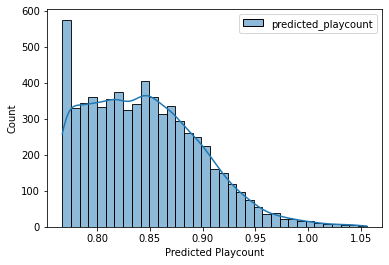

In [21]:

ax = sns.histplot(data = prediction_df, stat = "count", kde = True)
ax.set(xlabel = "Predicted Playcount")
image_name = "prediction_histplot"
fig = ax.get_figure()
fig.savefig(os.path.join(save_dir, image_name), facecolor = "w", dpi = 300)

<AxesSubplot:xlabel='predicted_playcount'>

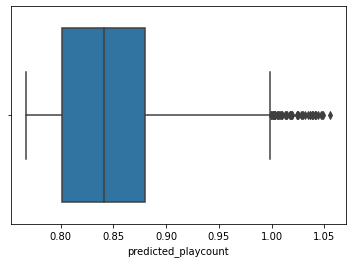

In [23]:
sns.boxplot(data = prediction_df, x = "predicted_playcount")

Looks like the algorithm is far too conservative, placing all the songs within 0.7 - 1.05 playcounts. So there's no songs I would really like or really hate.

In [24]:
prediction_df["predicted_playcount"].min(), prediction_df["predicted_playcount"].max() 

(0.7669973969459534, 1.0555949211120605)

In [31]:
prediction_df = prediction_df.rename(columns = {"artist": "artistName", "track":"trackName"})

In [38]:
combined_df = pd.merge(prediction_df, stones_500, on = "trackName")

In [42]:
combined_df.drop(["artistName_x"], axis = 1, inplace = True)

In [43]:
combined_df.head()

,trackName,predicted_playcount,artistName_y,albumName,trackId,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Sgt. Pepper's Lonely Hearts Club Band - Remast...,0.825271,The Beatles,Sgt. Pepper's Lonely Hearts Club Band,4fUKE8EULjQdHF4zb0M8FO,0.451,0.673,7,-9.115,1,...,0.7970,0.583,95.513,audio_features,4fUKE8EULjQdHF4zb0M8FO,spotify:track:4fUKE8EULjQdHF4zb0M8FO,https://api.spotify.com/v1/tracks/4fUKE8EULjQd...,https://api.spotify.com/v1/audio-analysis/4fUK...,122893,4
1,With A Little Help From My Friends - Remastere...,0.844859,The Beatles,Sgt. Pepper's Lonely Hearts Club Band,2RnPATK99oGOZygnD2GTO6,0.705,0.515,4,-9.343,1,...,0.3890,0.803,112.035,audio_features,2RnPATK99oGOZygnD2GTO6,spotify:track:2RnPATK99oGOZygnD2GTO6,https://api.spotify.com/v1/tracks/2RnPATK99oGO...,https://api.spotify.com/v1/audio-analysis/2RnP...,164107,4
2,Lucy In The Sky With Diamonds - Remastered 2009,0.873072,The Beatles,Sgt. Pepper's Lonely Hearts Club Band,25yQPHgC35WNnnOUqFhgVR,0.311,0.325,2,-9.042,1,...,0.1390,0.668,65.090,audio_features,25yQPHgC35WNnnOUqFhgVR,spotify:track:25yQPHgC35WNnnOUqFhgVR,https://api.spotify.com/v1/tracks/25yQPHgC35WN...,https://api.spotify.com/v1/audio-analysis/25yQ...,208467,1
3,Getting Better - Remastered 2009,0.841100,The Beatles,Sgt. Pepper's Lonely Hearts Club Band,3LtOmWpTXLhilL5odoKysR,0.632,0.471,0,-7.887,1,...,0.0712,0.764,121.672,audio_features,3LtOmWpTXLhilL5odoKysR,spotify:track:3LtOmWpTXLhilL5odoKysR,https://api.spotify.com/v1/tracks/3LtOmWpTXLhi...,https://api.spotify.com/v1/audio-analysis/3LtO...,168120,4
4,Fixing A Hole - Remastered 2009,0.835071,The Beatles,Sgt. Pepper's Lonely Hearts Club Band,3pKKxkeB1pOUMHwWBmKc3Y,0.469,0.507,0,-8.917,0,...,0.0783,0.619,112.984,audio_features,3pKKxkeB1pOUMHwWBmKc3Y,spotify:track:3pKKxkeB1pOUMHwWBmKc3Y,https://api.spotify.com/v1/tracks/3pKKxkeB1pOU...,https://api.spotify.com/v1/audio-analysis/3pKK...,156827,4


In [48]:
stones_albums_list = stones_albums_list.rename(columns = {"Artist":"artistName", "Album":"albumName"})

In [49]:
combined_df = pd.merge(stones_albums_list, combined_df, on = "albumName")

In [51]:
combined_df.drop(["artistName_y"], axis = 1, inplace = True)

In [52]:
combined_df.columns

Index(['Year', 'albumName', 'artistName', 'trackName', 'predicted_playcount',
       'trackId', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

<AxesSubplot:xlabel='Year', ylabel='predicted_playcount'>

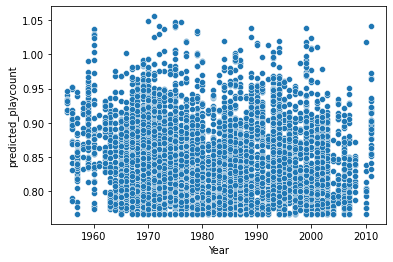

In [55]:
sns.scatterplot(data = combined_df, x = "Year", y = "predicted_playcount")

<AxesSubplot:>

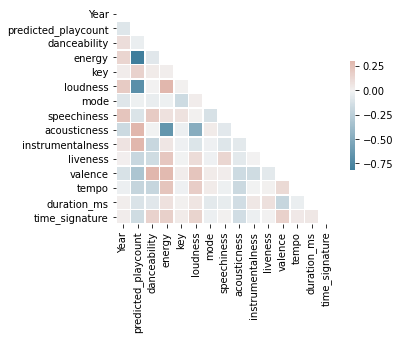

In [56]:
corr_matrix = combined_df.corr()
corr_matrix["predicted_playcount"].sort_values(ascending=False)

import numpy as np
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})